In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r"D:\Python world\jupyter_notebook\Data\EmployeeAttrition.csv")

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## this is data for supervised learnong

target: Attrition(Y)

In [5]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [7]:
x.shape ,y.shape

((1470, 34), (1470,))

In [8]:
x_ohe = pd.get_dummies(x)

In [9]:
x_ohe.shape

(1470, 55)

In [10]:
x_ohe.isna().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [11]:
rem_col = x_ohe.columns[x_ohe.nunique() ==1]

In [12]:
x_ohe.drop(rem_col,axis=1,inplace=True)

In [13]:
x_ohe.shape

(1470, 52)

In [14]:
x_ohe.drop('EmployeeNumber',axis=1,inplace=True)

In [16]:
x_ohe.shape

(1470, 51)

In [17]:
x_ohe.drop_duplicates(inplace=True)

## outlier detection

In [18]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [19]:
y =y.replace({'Yes':1,'No':0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20592\2780610726.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y =y.replace({'Yes':1,'No':0})


In [20]:
y.unique()

array([1, 0])

In [21]:
x_ohe_std = (x_ohe-x_ohe.mean()) / x_ohe.std()

## Train test split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x_ohe,y,test_size=0.3,random_state=42)

## PCA without standardlization(NOt recommended)

In [22]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(random_state=42)

In [26]:
pca.fit(x_train,y_train) # y_train is not compelsury

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


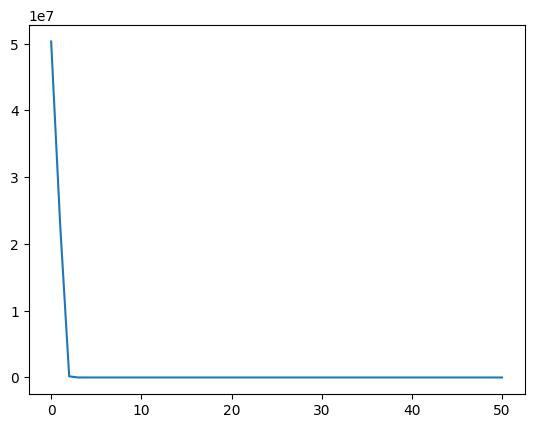

In [27]:
from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_)

## PCA with standardization  (reccommended)

In [30]:
x_train,x_test,y_train,y_test = train_test_split (x_ohe_std,y,test_size=0.3,random_state=42)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1029, 51), (441, 51), (1029,), (441,))

In [33]:
pca = PCA(random_state=7)

In [35]:
pca.fit(x_train,y_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,7


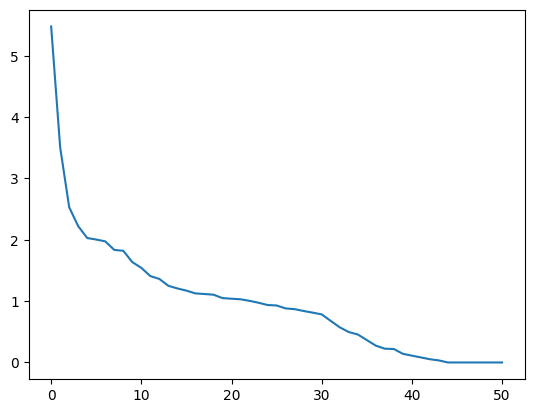

In [36]:
from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_)

In [37]:
pca.components_.shape

(51, 51)

## Perfome dimensionality reduction

In [38]:
pca = PCA(n_components=0.95,random_state=42)
pca.fit(x_train,y_train)

,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


In [42]:
pca.components_.shape

(33, 51)

In [44]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [46]:
x_train_pca.shape , x_test_pca.shape

((1029, 33), (441, 33))

##  Kernel PCA

In [47]:
from sklearn.decomposition import KernelPCA

In [48]:
kpca = KernelPCA(n_components=39, kernel='rbf', random_state=42)

In [49]:
kpca.fit(x_train,y_train)

,n_components,39
,kernel,'rbf'
,gamma,None
,degree,3
,coef0,1
,kernel_params,None
,alpha,1.0
,fit_inverse_transform,False
,eigen_solver,'auto'
,tol,0
,max_iter,None


In [50]:
x_train_kpca = kpca.transform(x_train)
x_test_kpca = kpca.transform(x_test)

In [51]:
x_train_kpca.shape ,x_test_kpca.shape

((1029, 39), (441, 39))

## RFE Feature selection

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [55]:
rfe = RFE(LogisticRegression(random_state=42))
rfe.fit(x_train,y_train)

,estimator,LogisticRegre...ndom_state=42)
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [56]:
rfe.ranking_

array([ 1, 19,  1, 13,  1, 24,  1,  7,  1, 25, 18,  1, 17, 12,  1, 14,  1,
        6,  1,  1,  1,  1,  1,  1,  1, 26,  4, 21, 16,  5, 15,  2, 22, 23,
        1, 10,  1,  1,  3,  1,  8,  9,  1, 27, 20,  1,  1, 11,  1,  1,  1])

In [57]:
sel_col = x_train.columns[rfe.ranking_==1]

In [58]:
sel_col

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'],
      dtype='object')

In [59]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [60]:
x_train_rfe.shape , x_test_rfe.shape

((1029, 25), (441, 25))